# Exploratory Data Analysis:Univariate Analysis

# 1.Defining the question

### a) Specifying the Question

###How to predict which individuals are most likely to have or use a bank account
###Univariate Analysis :Which individuals are most likely to have financial access

## b) Defining the Metric for success

### Providing a solution that will help provide an indication of the state of financial inclusion in East Africa
###Providing insights into some of the key demographic factors that might drive individuals’ financial outcomes. 

## c) Understanding the context

### Financial incusion also,access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth

###Recording the experimental Design

###Data Relevance

## Importing libraries


In [208]:
#importing pandas
import pandas as pd

#importing numpy
import numpy as np

#importing matplotlib
import matplotlib
import matplotlib.pyplot as plt

#importing seaborn
import seaborn as  sns

print('Libraries imported')

Libraries imported


## Reading the dataset

In [209]:
#Reading the Financial Dataset - 1.csv file
FinDat = pd.read_csv('Financial Dataset - 1.csv')

#Previewing the top five rows
FinDat.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [210]:
#Loading the VariableDefinitions.csv
VarDef = pd.read_csv('VariableDefinitions.csv')

#viewing of the dataset
VarDef



,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


# Checking the Dataset

In [211]:
#Checking the number of rows and columns
FinDat.shape

(23524, 13)

In [212]:
#Getting the description of the dataset
FinDat.describe(include= 'all')

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
count,23510,23524.000000,23524,23488,23509,23513,23496.000000,23490.000000,23490,23520,23492,23495,23494
unique,4,NaN,8735,2,2,2,NaN,NaN,2,6,5,7,10
top,Rwanda,NaN,uniqueid_1114,No,Rural,Yes,NaN,NaN,Female,Head of Household,Married/Living together,Primary education,Self employed
freq,8735,NaN,4,20179,14338,17449,NaN,NaN,13859,12829,10739,12775,6428
mean,NaN,2016.979000,NaN,NaN,NaN,NaN,3.681818,38.804300,NaN,NaN,NaN,NaN,NaN
std,NaN,0.899669,NaN,NaN,NaN,NaN,2.279933,16.519996,NaN,NaN,NaN,NaN,NaN
min,NaN,2016.000000,NaN,NaN,NaN,NaN,0.000000,16.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,2016.000000,NaN,NaN,NaN,NaN,2.000000,26.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,2017.000000,NaN,NaN,NaN,NaN,3.000000,35.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,2018.000000,NaN,NaN,NaN,NaN,5.000000,49.000000,NaN,NaN,NaN,NaN,NaN


In [213]:
# Getting info about the dataset
FinDat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [214]:
#Total number of products and unique values of the columns
print(FinDat.nunique())

country                      4
year                         6
uniqueid                  8735
Has a Bank account           2
Type of Location             2
Cell Phone Access            2
household_size              21
Respondent Age              85
gender_of_respondent         2
The relathip with head       6
marital_status               5
Level of Educuation          7
Type of Job                 10
dtype: int64


## External Data Source Validation

### FinScope remains the most comprehensive demand side instrument of its kind, and has to date been conducted in over 30 countries. This places FinMark Trust in a unique position to support countries in SADC, West Africa, Asia and beyond, to understand their demand-side financial inclusion landscape
http://finmark.org.za/programmes/finscope/

## Tidying the dataset

In [215]:
#Renaming the column heads so as to make the dataframe easier to work with
FinDat.rename(columns={'Has a Bank account':'account_holder',
                       'Type of Location':'location',
                       'Cell Phone Access':'phone_access',
                       'Respondent Age':'age',
                       'gender_of_respondent':'gender',
                       'The relathip with head':'relationship_with_head',
                       'Level of Educuation':'Education',
                       'Type of Job':'job'}, 
                 inplace=True)

print(FinDat.columns)

Index(['country', 'year', 'uniqueid', 'account_holder', 'location',
       'phone_access', 'household_size', 'age', 'gender',
       'relationship_with_head', 'marital_status', 'Education', 'job'],
      dtype='object')


In [216]:
#Checking for duplicates
FinDat.duplicated().any()

False

In [217]:
#Deleting unnecesarry columns
FinDat_1= FinDat.drop('uniqueid', axis=1)


In [218]:
#Checking for null values
FinDat_1.isnull().sum()

country                   14
year                       0
account_holder            36
location                  15
phone_access              11
household_size            28
age                       34
gender                    34
relationship_with_head     4
marital_status            32
Education                 29
job                       30
dtype: int64

In [219]:
#Dropping null values
FinDat_2 = FinDat_1.dropna()

print(FinDat_2.isnull().sum())

country                   0
year                      0
account_holder            0
location                  0
phone_access              0
household_size            0
age                       0
gender                    0
relationship_with_head    0
marital_status            0
Education                 0
job                       0
dtype: int64


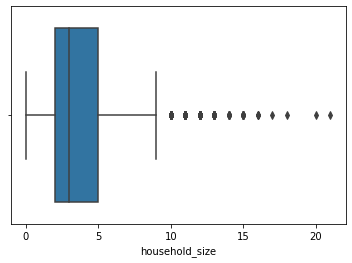

In [220]:
#Outliers detection for household_size
sns.boxplot(x=FinDat_2['household_size'])

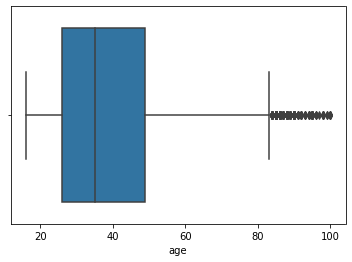

In [221]:
#Outliers detection for age
sns.boxplot(x = FinDat_2['age'])

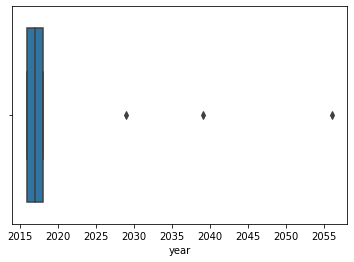

In [222]:
#Outliers detection for age
sns.boxplot(x = FinDat_2['year'])

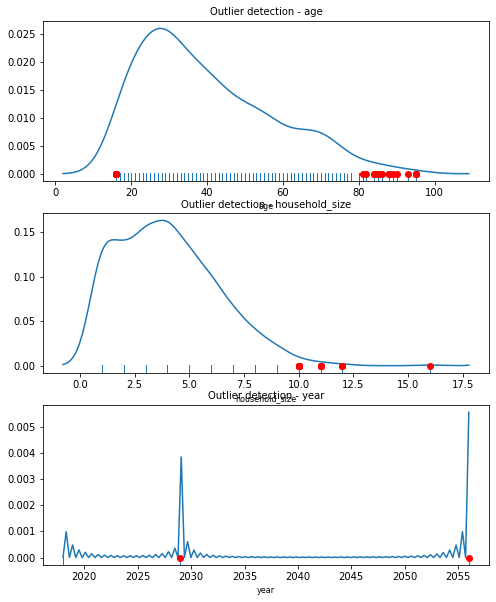

In [223]:
#Removing outliers
def percentile_based_outlier(data, threshold=95):
    diff = (100 - threshold) / 2
    minval, maxval = np.percentile(data, [diff, 100 - diff])
    return (data < minval) | (data > maxval)

col_names = ['age','household_size','year']

fig, ax = plt.subplots(len(col_names), figsize=(8,10))

for i, col_val in enumerate(col_names):
    x = FinDat_2[col_val][:1000]
    sns.distplot(x, ax=ax[i], rug=True, hist=False)
    outliers = x[percentile_based_outlier(x)]
    ax[i].plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    ax[i].set_title('Outlier detection - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

In [224]:
#Checking for anomalies
q1_ResAge = FinDat_2['age'].quantile(.25)
q3_ResAge = FinDat_2['age'].quantile(.75)

iqr_ResAge = q3_ResAge - q1_ResAge

q1_HouSi = FinDat_2['household_size'].quantile(.25)
q3_HouSi = FinDat_2['household_size'].quantile(.75)

iqr_HouSi = q3_HouSi - q1_HouSi

print(iqr_HouSi, iqr_ResAge)

FinDat_2['age'].std()


3.0 23.0


16.51980349804178

# Exporatory Data Analysis(EDA) : Univariate

# Univariate analysis of categorical data

In [225]:
#Frequency table show the number of countries in the dataset
FinDat_2.country.value_counts()

Rwanda      8684
Tanzania    6500
Kenya       6064
Uganda      2095
Name: country, dtype: int64

In [226]:
#Measuring mode of Type of Job
FinDat_2['job'].mode()

0    Self employed
dtype: object

Categorical Variables

Text(0.5, 1.0, 'relationship_with_head')

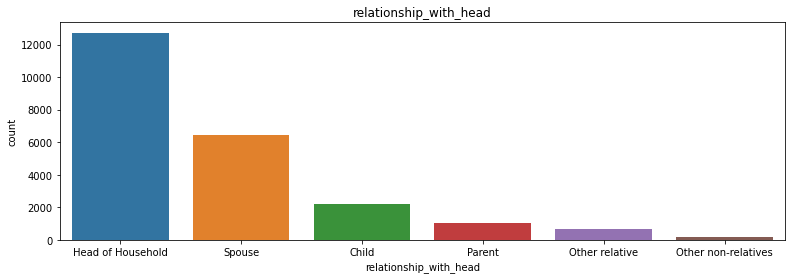

In [227]:
#Displaying the relationship with head variable
plt.figure(figsize=(13,4))

sns.countplot(FinDat_2['relationship_with_head'].dropna(), order = FinDat_2['relationship_with_head'].value_counts().index);
plt.title('relationship_with_head')

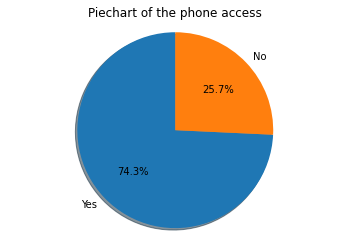

In [228]:
#Displaying the phone access variable
#Finding the count of values in the gender column
FinDat_2['phone_access'].value_counts()

#Extracting the indices and values from the phone access column
FinDat_2['phone_access'].value_counts().index
FinDat_2['phone_access'].value_counts().values

#Ploting a pie chart of the phone access data
label=FinDat_2['phone_access'].value_counts().index
size=FinDat_2['phone_access'].value_counts().values

plt.pie(size, labels=label, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title('Piechart of the phone access')
plt.show()

Text(0.5, 1.0, 'location')

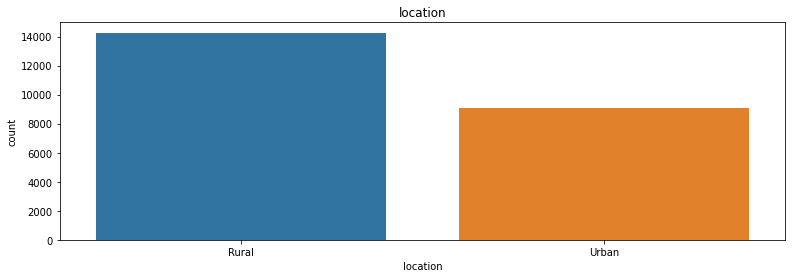

In [229]:
#Displaying the column variable
plt.figure(figsize=(13,4))

sns.countplot(FinDat_2['location'].dropna(), order = FinDat_2['location'].value_counts().index);
plt.title('location')

Text(0.5, 1.0, 'Bar graph of Bank account holders')

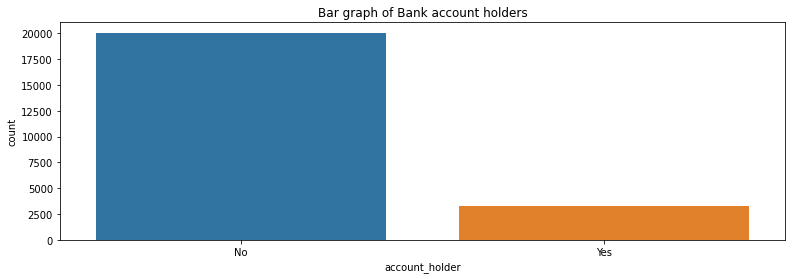

In [230]:
#Displaying the account holder variable
plt.figure(figsize=(13,4))

sns.countplot(FinDat_2['account_holder'].dropna(), order = FinDat_2['account_holder'].value_counts().index);
plt.title('Bar graph of Bank account holders')

Text(0.5, 1.0, 'Bar chart on Gender of the respondent')

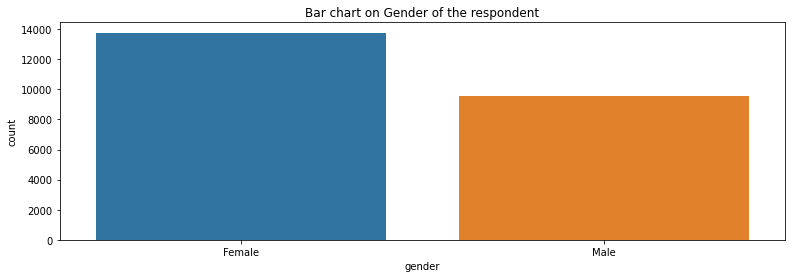

In [231]:
#Displaying the gender variable

plt.figure(figsize=(13,4))

sns.countplot(FinDat_2['gender'].dropna(), order = FinDat_2['gender'].value_counts().index);
plt.title('Bar chart on Gender of the respondent')

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

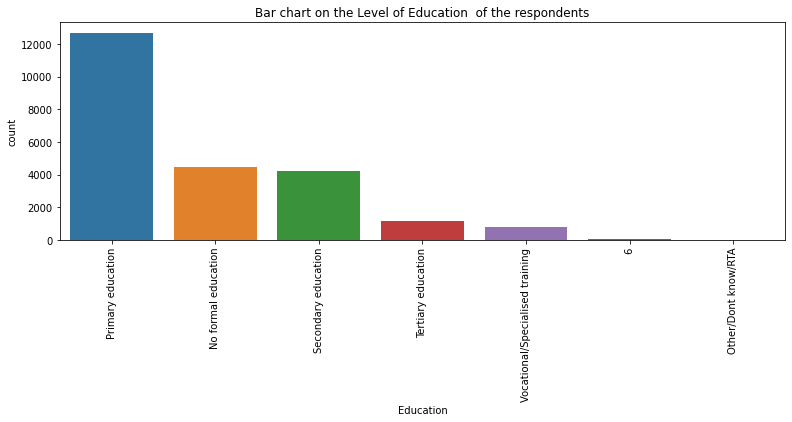

In [232]:
#Displaying the education variable
plt.figure(figsize=(13,4))

sns.countplot(FinDat_2['Education'].dropna(), order = FinDat_2['Education'].value_counts().index);
plt.title('Bar chart on the Level of Education  of the respondents')
plt.xticks(rotation= 90)

Text(0.5, 1.0, 'Bar chart of the marital status of the respondent')

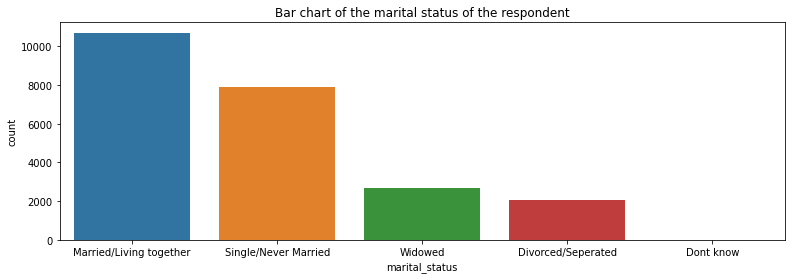

In [233]:
#Displaying the marital status variable
plt.figure(figsize=(13,4))

sns.countplot(FinDat_2['marital_status'].dropna(), order = FinDat_2['marital_status'].value_counts().index);
plt.title('Bar chart of the marital status of the respondent')

Text(0.5, 1.0, 'Type of job')

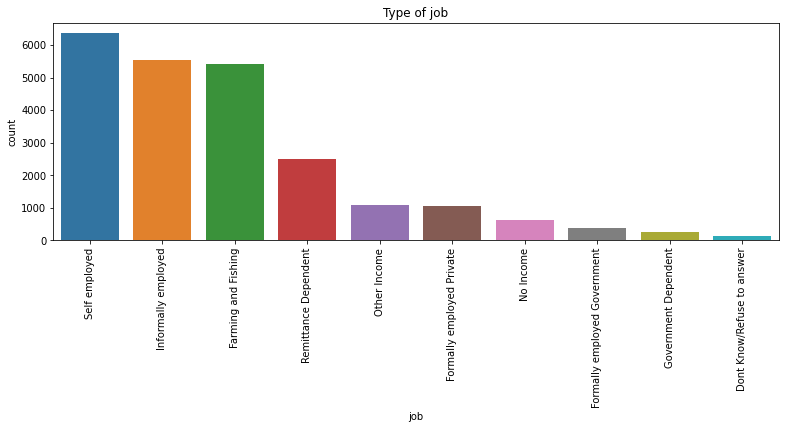

In [234]:
#Displaying the job variable
plt.figure(figsize = (13,4))

sns.countplot(FinDat_2['job'].dropna(), order = FinDat_2['job'].value_counts(). index);
plt.xticks(rotation = 90);
plt.title('Type of job')

Univariate analysis of numeric variables

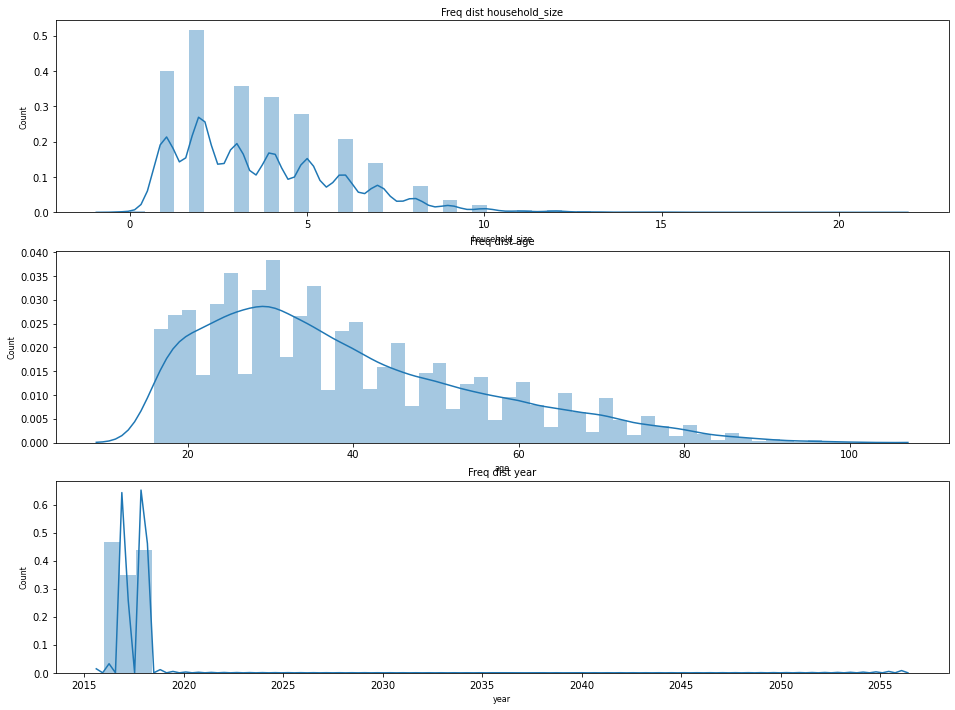

In [235]:
#Displaying household size, age and year variables
col_names = ['household_size','age','year']

fig, ax = plt.subplots(len(col_names), figsize=(16,12))

for i, col_val in enumerate(col_names):

    sns.distplot(FinDat_2[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

In [236]:
#Computing household size mean
FinDat_2['household_size'].mean()

3.6886432763569377

## Implementing the solution

In [237]:
#Trying find value counts in the account holder variable
FinDat_2.groupby(['account_holder'])['account_holder'].count().sort_values(ascending = False)


account_holder
No     20046
Yes     3297
Name: account_holder, dtype: int64

In [238]:
#Creating a dataframe where all the rows have account holders
FinDat_3 = FinDat_2.loc[(FinDat_2.account_holder == 'Yes')]
FinDat_3

,country,year,account_holder,location,phone_access,household_size,age,gender,relationship_with_head,marital_status,Education,job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
8,Kenya,2018,Yes,Rural,Yes,3.0,54.0,Male,Head of Household,Married/Living together,Secondary education,Farming and Fishing
11,Kenya,2018,Yes,Rural,Yes,3.0,69.0,Male,Head of Household,Married/Living together,Secondary education,Other Income
17,Kenya,2018,Yes,Rural,Yes,6.0,27.0,Female,Head of Household,Married/Living together,Secondary education,Self employed
...,...,...,...,...,...,...,...,...,...,...,...,...
23327,Uganda,2018,Yes,Urban,Yes,1.0,24.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23331,Uganda,2018,Yes,Rural,Yes,3.0,26.0,Female,Head of Household,Married/Living together,Secondary education,Other Income
23351,Uganda,2018,Yes,Rural,Yes,5.0,36.0,Female,Head of Household,Widowed,Primary education,No Income
23358,Uganda,2018,Yes,Rural,Yes,10.0,50.0,Female,Head of Household,Widowed,Primary education,Self employed


In [239]:
#Frequency table show the number of countries in the dataset
FinDat_3.country.value_counts()

Kenya       1520
Rwanda       997
Tanzania     599
Uganda       181
Name: country, dtype: int64

Text(0.5, 1.0, 'Type of job')

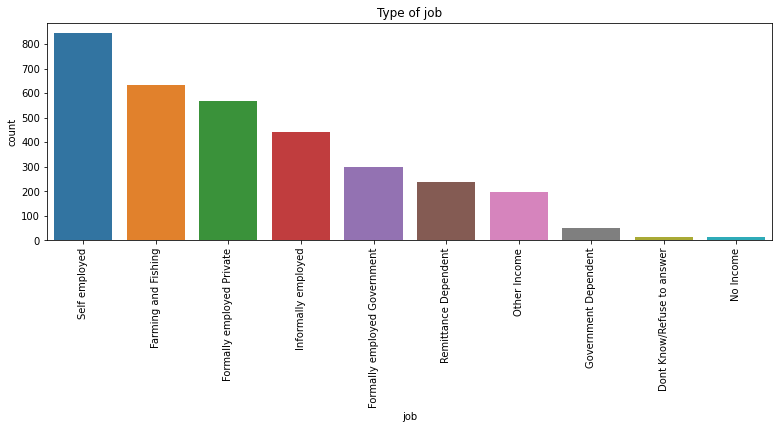

In [240]:
#Viewing type of jobs of everyone with a bank account
plt.figure(figsize = (13,4))

sns.countplot(FinDat_3['job'].dropna(), order = FinDat_3['job'].value_counts(). index);
plt.xticks(rotation = 90);
plt.title('Type of job')

Text(0.5, 1.0, 'Bar chart on Gender of the respondent')

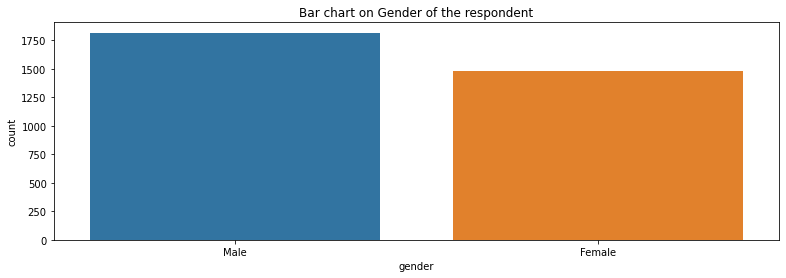

In [241]:
#Displaying the gender of most account holders according to the dataset
plt.figure(figsize=(13,4))

sns.countplot(FinDat_3['gender'].dropna(), order = FinDat_3['gender'].value_counts().index);
plt.title('Bar chart on Gender of the respondent')

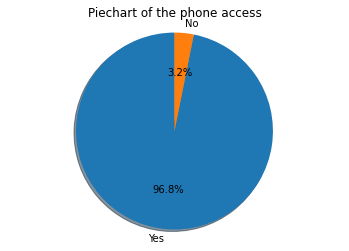

In [242]:
#Displaying the data with the variable of phone access
#Finding the count of values in the phone access column
FinDat_3['phone_access'].value_counts()

#Extracting the indices and values from the phone access column
FinDat_3['phone_access'].value_counts().index
FinDat_3['phone_access'].value_counts().values

#Ploting a pie chart of the phone access data
label=FinDat_3['phone_access'].value_counts().index
size=FinDat_3['phone_access'].value_counts().values

plt.pie(size, labels=label, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title('Piechart of the phone access')
plt.show()

## Bivariate Analysis

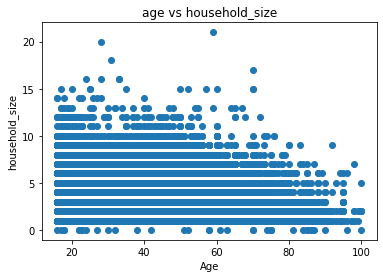

In [243]:
# Plotting our scatterplot of age and household_size
plt.scatter(FinDat['age'], FinDat['household_size'])

# Giving our scatterplot a title
plt.title('age vs household_size')

# Labelling our x axis
plt.xlabel('Age')

# Labelling our y axis
plt.ylabel('household_size')

# Displaying our scatterplot
plt.show()

# There is no relation because the points are scattered throughout the graph.

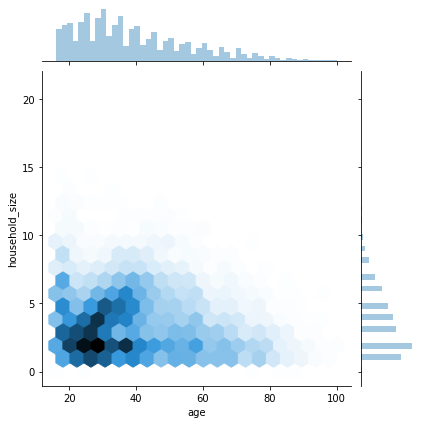

In [244]:
#Displaying age and household in a less noisy display
sns.jointplot(x='age', y='household_size', data=FinDat_2, kind='hex', 
              gridsize=20)

In [245]:
#Checking for correlation
FinDat_2["household_size"].corr(FinDat_2["age"])
#There is a weak negative correlation. 

-0.11970919507762415

Text(0.5, 1.0, 'Correlation between different fearures')

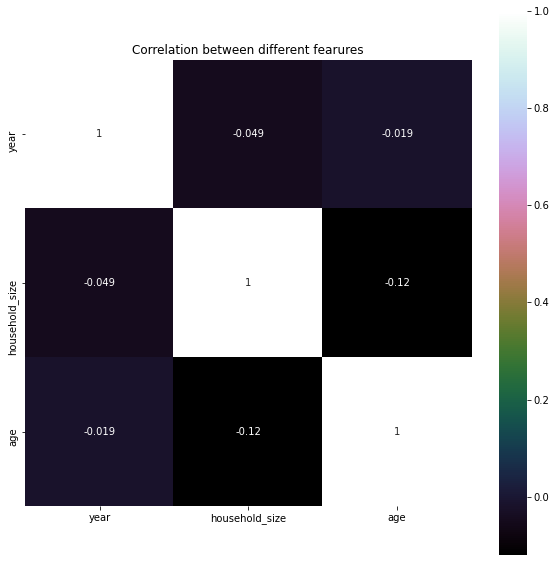

In [246]:
#Displaying correlation of household, age and years
correlation = FinDat_2.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different fearures')
#There is no correlation

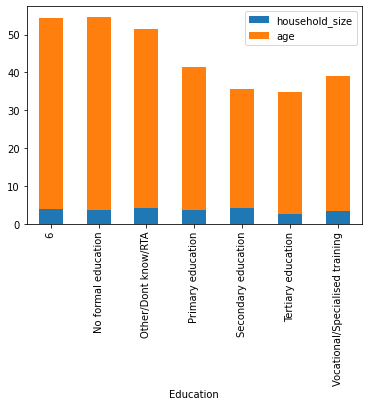

In [247]:
#Displaying stacked bars of household_size, age on education
h = FinDat_2.groupby(['Education']).mean()[['household_size', 'age']]
h
h.plot.bar(stacked=True)

In [249]:
#Performing a z test
from scipy import stats

a = FinDat_2['age']
stats.zscore(a)

array([-0.89624712,  1.88834928, -0.77517771, ..., -0.71464301,
       -0.53303889, -1.13838594])

## Multivariate Analysis

In the multivariate Analysis. I will use PCA since most variable are binomial i.e either true or false

In [250]:
#Checking our clean dataset
FinDat_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23343 entries, 0 to 23523
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23343 non-null  object 
 1   year                    23343 non-null  int64  
 2   account_holder          23343 non-null  object 
 3   location                23343 non-null  object 
 4   phone_access            23343 non-null  object 
 5   household_size          23343 non-null  float64
 6   age                     23343 non-null  float64
 7   gender                  23343 non-null  object 
 8   relationship_with_head  23343 non-null  object 
 9   marital_status          23343 non-null  object 
 10  Education               23343 non-null  object 
 11  job                     23343 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 2.3+ MB


In [251]:
#Replacing column values
FinDat_2['account_holder'].replace({'Yes':'1', 'No':'0'}, inplace = True)
FinDat_2

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,country,year,account_holder,location,phone_access,household_size,age,gender,relationship_with_head,marital_status,Education,job
0,Kenya,2018,1,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,0,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,1,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,0,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,0,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,0,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,0,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,0,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,0,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [252]:
#Replacing column values
FinDat_2['location'].replace({'Rural':'1', 'Urban':'0'}, inplace = True)
FinDat_2

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,country,year,account_holder,location,phone_access,household_size,age,gender,relationship_with_head,marital_status,Education,job
0,Kenya,2018,1,1,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,0,1,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,1,0,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,0,1,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,0,0,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,0,1,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,0,1,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,0,1,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,0,0,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [253]:
#Replacing column values
FinDat_2['phone_access'].replace({'Yes':'1', 'No':'2'}, inplace = True)
FinDat_2

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,country,year,account_holder,location,phone_access,household_size,age,gender,relationship_with_head,marital_status,Education,job
0,Kenya,2018,1,1,1,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,0,1,2,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,1,0,1,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,0,1,1,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,0,0,2,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,0,1,1,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,0,1,1,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,0,1,1,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,0,0,1,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [254]:
#Replacing column values
FinDat_2['gender'].replace({'Female':'1', 'Male':'2'}, inplace = True)
FinDat_2

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,country,year,account_holder,location,phone_access,household_size,age,gender,relationship_with_head,marital_status,Education,job
0,Kenya,2018,1,1,1,3.0,24.0,1,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,0,1,2,5.0,70.0,1,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,1,0,1,5.0,26.0,2,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,0,1,1,5.0,34.0,1,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,0,0,2,8.0,26.0,2,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,0,1,1,4.0,48.0,1,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,0,1,1,2.0,27.0,1,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,0,1,1,5.0,27.0,1,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,0,0,1,7.0,30.0,1,Parent,Divorced/Seperated,Secondary education,Self employed


In [255]:
#Making all the columns into numerical values
FinDat_4 =pd.get_dummies(FinDat_2, prefix_sep='_', drop_first=True)
FinDat_4.head()

,year,household_size,age,country_Rwanda,country_Tanzania,country_Uganda,account_holder_1,location_1,phone_access_2,gender_2,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,relationship_with_head_Parent,relationship_with_head_Spouse,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,Education_No formal education,Education_Other/Dont know/RTA,Education_Primary education,Education_Secondary education,Education_Tertiary education,Education_Vocational/Specialised training,job_Farming and Fishing,job_Formally employed Government,job_Formally employed Private,job_Government Dependent,job_Informally employed,job_No Income,job_Other Income,job_Remittance Dependent,job_Self employed
0,2018,3.0,24.0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,2018,5.0,70.0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2018,5.0,26.0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,2018,5.0,34.0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
4,2018,8.0,26.0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [257]:
#Preprocessing
# The first preprocessing step is to divide the dataset into a feature set and corresponding labels
x=FinDat_4.drop('account_holder_1',1)
y=FinDat_4['account_holder_1']

In [271]:
#Viewing our x
x.shape

(23343, 33)

In [261]:
#Viewing our y
y.shape

(23343,)

In [262]:
#Standardization
#Standardization refers to shifting the distribution of each attribute to have a mean of zero 
#and a standard deviation of one (unit variance)
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_st = sc.fit_transform(x)


In [263]:
#computing eigen vectors and eigen values

#Covariance matrix
mean_vec = np.mean(x_st, axis=0)

cov_mat = (x_st - mean_vec).T.dot((x_st - mean_vec)) / (x_st.shape[0]-1)

print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00004284e+00 -4.89040912e-02 -1.90626616e-02 ...  9.46434167e-02
   9.06086381e-02  1.68536249e-01]
 [-4.89040912e-02  1.00004284e+00 -1.19714324e-01 ...  6.24277696e-02
   9.22844670e-03 -1.63173137e-01]
 [-1.90626616e-02 -1.19714324e-01  1.00004284e+00 ... -1.42972410e-02
  -5.92733755e-02  1.83842989e-05]
 ...
 [ 9.46434167e-02  6.24277696e-02 -1.42972410e-02 ...  1.00004284e+00
  -7.63254468e-02 -1.34608856e-01]
 [ 9.06086381e-02  9.22844670e-03 -5.92733755e-02 ... -7.63254468e-02
   1.00004284e+00 -2.12398226e-01]
 [ 1.68536249e-01 -1.63173137e-01  1.83842989e-05 ... -1.34608856e-01
  -2.12398226e-01  1.00004284e+00]]


In [264]:
#Eigen decomposition of covariance matrix
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [265]:
#Selecting principle components using eigen values

# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
3.593400844185309
2.67556025960317
2.155130337644103
2.042275277977765
1.8689963801012046
1.4801448735059581
1.315987662519941
1.2405636950541852
1.2145807992039763
1.1164538051478103
1.0713678765304728
1.015215122358048
1.0092853273733022
1.0004473515820294
0.9919428445151458
0.971364004630308
0.9652226058917636
0.9501955046073101
0.8910864426207862
0.8190361950980374
0.7794320396491357
0.7476228555621309
0.633773907981686
0.5973274842655651
0.5059140924857763
0.4211964270570541
0.34900942900273263
0.31626241655380594
0.11891464663285622
0.09260448878055483
0.04268378191299604
0.006590853683287225
0.0018241268850285018


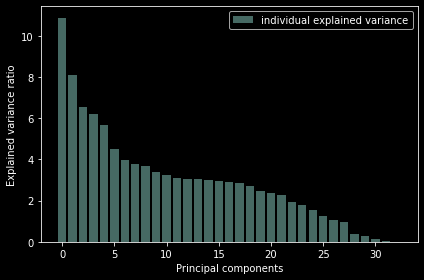

In [274]:
#Explained variance

tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]

with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(33), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [277]:
#The plot above shows the maximum explained variance ratio by principle component 1 to be about 12 percent. 
#Principal Component 2 is at 8 percent,
# while three, four , five and six principal componet  have more than 5 percernt explained variance ratio 
#seven to twenty two principal components have a variance ratio of above 2. 
#While the rest we will drop

matrix_w = np.hstack((eig_pairs[0][1].reshape(33,1), 
                      eig_pairs[1][1].reshape(33,1)
                    ))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[-2.39365688e-01 -8.26378778e-02]
 [ 2.58525479e-01 -2.40731204e-01]
 [ 9.75123243e-02  4.23280748e-01]
 [ 3.97230419e-01  2.30373722e-02]
 [-3.90197128e-01  1.07657885e-01]
 [-3.89179276e-02 -1.47686892e-01]
 [ 3.28128586e-01 -1.50578168e-02]
 [-1.10342567e-01  9.78880224e-02]
 [-2.65263331e-02  1.33464649e-01]
 [ 6.81252614e-03  4.67897552e-01]
 [-2.05396674e-02 -5.12479626e-02]
 [-7.19307864e-02 -9.43916806e-02]
 [-1.00839451e-01 -1.13750370e-01]
 [ 7.40614375e-02 -3.35307971e-01]
 [-5.42366258e-03  6.75951782e-03]
 [ 3.13436445e-01 -1.63070808e-01]
 [-3.10399946e-01 -9.49598293e-02]
 [ 4.21264172e-02  3.84835848e-01]
 [ 1.03537248e-01  2.77474324e-01]
 [-2.90100904e-03 -4.86032330e-04]
 [-1.75016998e-02 -5.91952185e-02]
 [-3.97942350e-03 -1.84146372e-01]
 [-1.06661354e-01 -1.60176669e-02]
 [-4.19611060e-02 -3.05096308e-02]
 [ 3.12214078e-01  5.92837380e-02]
 [ 5.66816816e-03 -2.11173284e-02]
 [-6.82600404e-02 -2.13651100e-02]
 [-1.06776250e-04  1.40142173e-01]
 [ 7.5685

In [279]:
#Projection matrix
#Projection Onto the New Feature Space,
# In this last step we will use the 33×2-dimensional projection matrix W 
#to transform our samples onto the new subspace via the equation Y=X×W

y = x_st.dot(matrix_w)
y

array([[-0.0581559 , -2.27455357],
       [ 0.41907625,  4.62830161],
       [-2.65029208, -1.51318565],
       ...,
       [-0.46369846, -1.22774227],
       [-1.65554566, -2.49655399],
       [-0.85016626, -2.98527608]])

Text(0, 0.5, 'Cumulative explained variance')

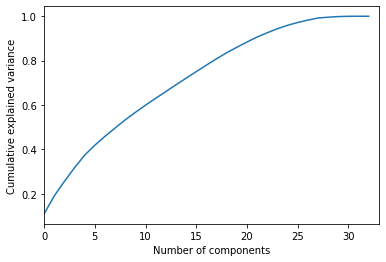

In [284]:
#PCA
from sklearn.decomposition import PCA
pca = PCA().fit(x_st)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,33,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

#The figure below shows 90% cumulative explained variance by the 20th component.
#This shows that we can drop 21-33

In [289]:
#Applying PCA
from sklearn.decomposition import PCA 
sklearn_pca = PCA(n_components=20)
y_sklearn = sklearn_pca.fit_transform(x_st)

In [290]:
print(y_sklearn)

[[ 0.0581559  -2.27455359  1.436677   ...  0.0857497   1.01058858
   0.13900827]
 [-0.41907625  4.62830159  1.91095462 ...  0.25248029 -0.28353534
   1.43193348]
 [ 2.65029208 -1.51318567  1.32181278 ... -1.5121091   2.06480622
  -1.33746187]
 ...
 [ 0.46369846 -1.22774227  2.69291665 ...  2.0910534   1.52294372
  -0.40484012]
 [ 1.65554566 -2.496554    2.59779084 ...  1.04652299  3.00504689
  -0.54843758]
 [ 0.85016626 -2.98527608  2.66177615 ... -1.81536414 -0.96156468
   2.13778754]]


In [292]:
y_sklearn.shape

(23343, 20)

#Exploratory Data Analysis Conclusions

> The Finscope dataset contains 13 variables, some missing data and outliers



> The variable definition dataset contains a list of variables and their description


Most of the respondents don't have access to bank accounts as seen in the dataset above.

According to the above data set the most individuals with higher financial access include:
*   Kenya is the leading East Africa country with the most financial inclusion.
*   Mostly self employed people are most likely to have a bank account
*   Phone access plays a vital role since those people with phone access are more likely to have a bank account 











## Challenging the solution


*Kenya and Rwanda have the highest proportion of their adult populations accessing financial services, a newly-published report says, making them East Africa’s most financially inclusive economies. https://www.theeastafrican.co.ke/business/Kenya-Rwanda-top-region-in-financial-inclusion/2560-5065136-9crxya/index.html

*The adoption of mobile telephony to provide financial services in Africa has become instrumental in integrating the hitherto unbanked segments of the population to the mainstream financial systems.
https://www.sciencedirect.com/science/article/pii/S1879933716301695

